<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/logistic_regression_claimants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


In [22]:
claimants=pd.read_csv("/content/claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [23]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [24]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [25]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [26]:
claimants.shape

(1340, 7)

In [27]:
claimants.drop(['CASENUM'],inplace=True, axis=1)

In [28]:
claimants.shape

(1340, 6)

In [29]:
claimants=claimants.dropna()
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [30]:
claimants.shape

(1096, 6)

In [31]:
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [32]:
classifier= LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [33]:
y_predict=classifier.predict(X)
y_predict

array([0, 1, 1, ..., 1, 0, 1])

In [35]:

y_predict_df= pd.DataFrame({'actual':Y,'Predicted_prob':classifier.predict(X)})
y_predict_df

,actual,Predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y,y_predict)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [40]:
((381+395)/(381+123+197+395))*100

70.8029197080292

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
fpr,tpr,threshold=roc_curve(Y,classifier.predict_proba(X)[:,1])

In [43]:
auc=roc_auc_score(Y,y_predict)

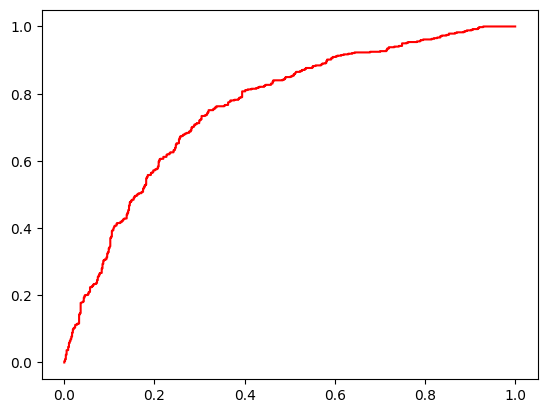

In [44]:
plt.plot(fpr,tpr,color='red')

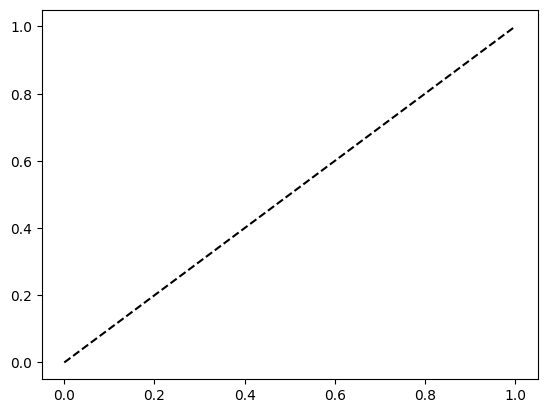

In [45]:
plt.plot([0,1],[0,1],'k--')

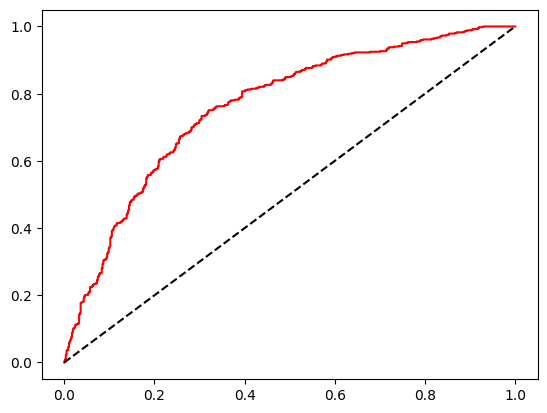

In [46]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')

plt.show()